### Data Science and Machine Learning Toolkit
#### By: Sebastián Medina Jiménez 
https://www.linkedin.com/in/sebasmedina/
## 1. Feature Engineering





### 1. Scaling



In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()

# Access the data and target variables
X = iris.data  # Features (input variables)
y = iris.target  # Target variable (output variable)

# Different Scaling Methods
# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

# Min-Max scaling
scaler_min_max = MinMaxScaler()
X_min_max_scaled = scaler_min_max.fit_transform(X)



### 2. Imputation methods

In [3]:
# Different Imputation Methods
# Impute missing values with the mean
imputer_mean = SimpleImputer(strategy='mean')
X_imputed_mean = imputer_mean.fit_transform(X)

# Impute missing values with the median
imputer_median = SimpleImputer(strategy='median')
X_imputed_median = imputer_median.fit_transform(X)


### 3. Feature selection

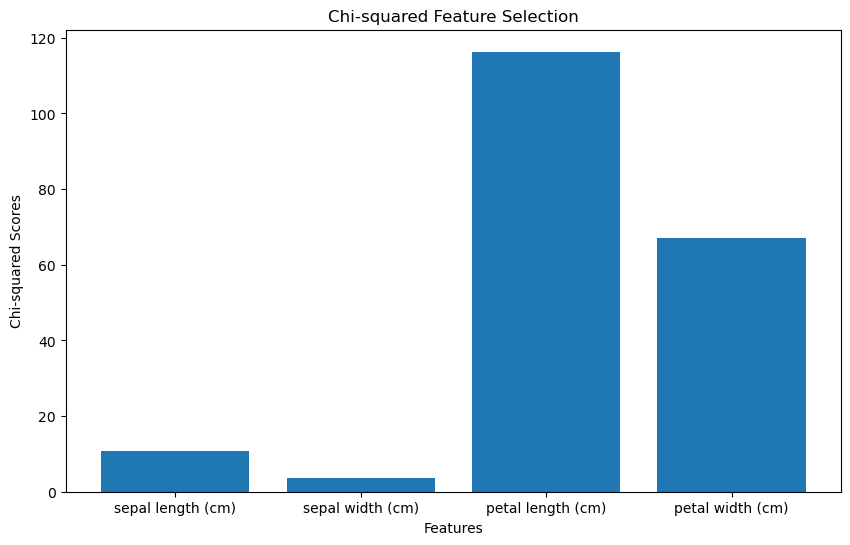

In [4]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

# Select the top K features based on chi-squared statistics
kbest_chi2 = SelectKBest(score_func=chi2, k=2)
X_selected_chi2 = kbest_chi2.fit_transform(X, y)

# Get the chi-squared scores for all features
chi2_scores = kbest_chi2.scores_

# Get the feature names
feature_names = iris.feature_names

# Create a bar chart to visualize the chi-squared scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), chi2_scores, tick_label=feature_names)
plt.xlabel('Features')
plt.ylabel('Chi-squared Scores')
plt.title('Chi-squared Feature Selection')
plt.show()

### 4. Dimension reduction


### PCA

Principal Component Analysis (PCA) is a technique used in data analysis and machine learning to simplify and reduce the dimensionality of complex datasets. It's like finding the most important information in a large dataset while discarding less important details. Here's a simple explanation of PCA:

Imagine you have a lot of data about something, and this data has many different aspects or features. For instance, you might have measurements of various properties of flowers, like petal length, petal width, sepal length, and sepal width. Now, you want to analyze this data, but it's too complex to work with directly.

PCA helps you by finding a new way to look at this data, a way that combines the original features into new features called "principal components." These principal components are designed in such a way that the first one captures as much information as possible from the original data. The second component captures the remaining information while being orthogonal (uncorrelated) to the first one. And so on for as many components as you choose.

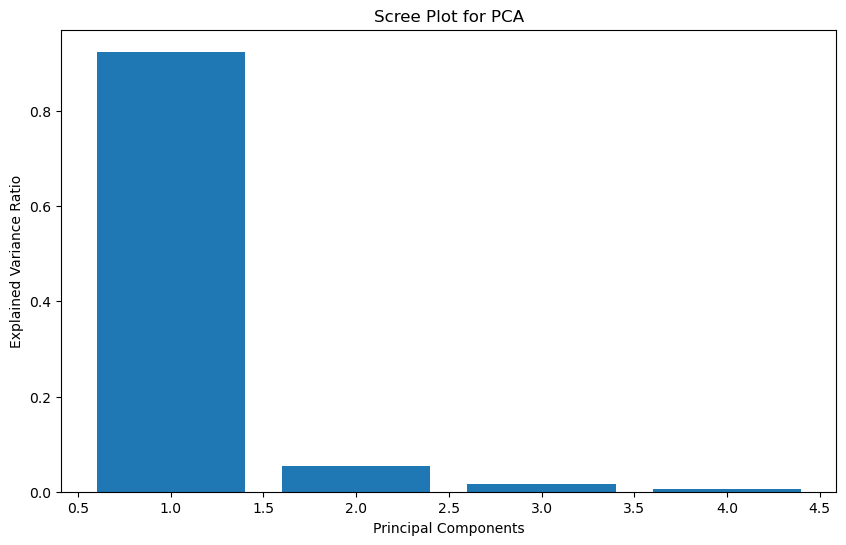

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for dimension reduction
pca = PCA()
X_pca = pca.fit_transform(X)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot to visualize explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.show()

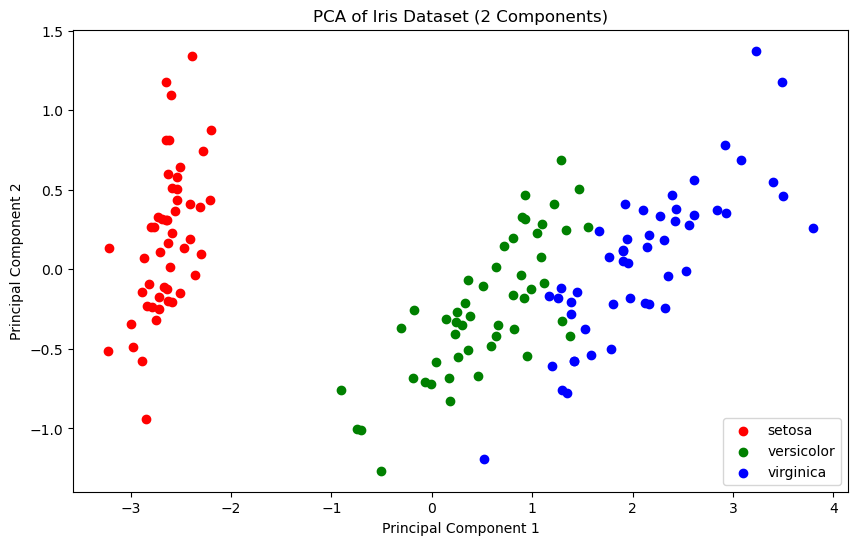

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for dimension reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA-transformed data and target variable
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = iris.target_names[iris.target]

# Create a scatter plot with different colors for each flower type
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']  # Red for setosa, green for versicolor, blue for virginica
for i, flower_type in enumerate(iris.target_names):
    subset = pca_df[pca_df['Species'] == flower_type]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=flower_type, color=colors[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2 Components)')
plt.legend()
plt.show()


### t-SNE
t-SNE, or t-distributed Stochastic Neighbor Embedding, is a technique used to visualize and simplify complex data in a way that helps you see patterns and relationships. Imagine you have data with lots of details, and you want to understand how different points relate to each other.

t-SNE does this by taking the complex data and finding a new representation where similar points are close together, and dissimilar points are farther apart. It's like mapping data points on a piece of paper in a way that maintains their relationships.

In simple words, t-SNE helps you see clusters and structures in your data, making it easier to understand and work with, especially when you have high-dimensional data that's hard to grasp at first glance. It's often used for data visualization and exploration, especially in machine learning and data analysis.

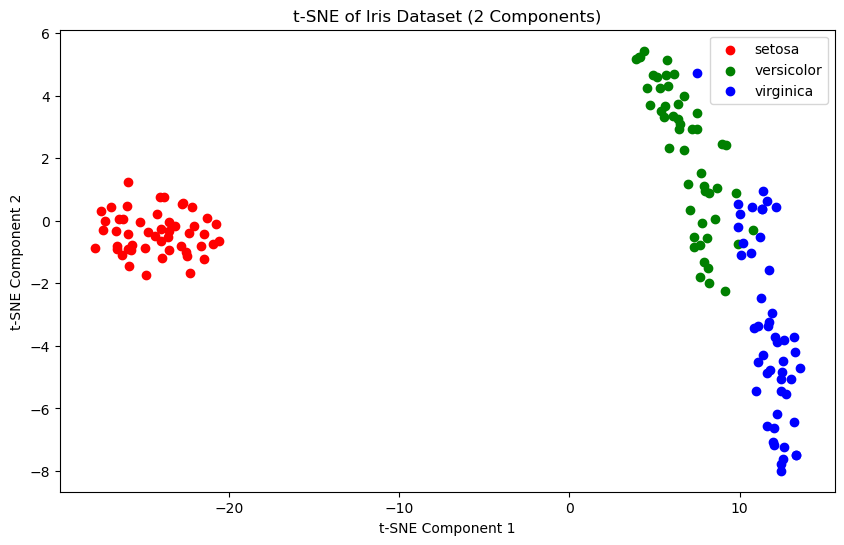

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE for dimension reduction to 2 components
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and target variable
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Species'] = iris.target_names[iris.target]

# Create a scatter plot with different colors for each flower type
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']  # Red for setosa, green for versicolor, blue for virginica
for i, flower_type in enumerate(iris.target_names):
    subset = tsne_df[tsne_df['Species'] == flower_type]
    plt.scatter(subset['t-SNE Component 1'], subset['t-SNE Component 2'], label=flower_type, color=colors[i])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Iris Dataset (2 Components)')
plt.legend()
plt.show()


**Advantages of t-SNE**

1. **Preservation of Local Structure:** t-SNE excels at preserving the local structure of data. It's good at retaining the relationships between nearby data points in the lower-dimensional space. This means that similar data points in the high-dimensional space remain close in the t-SNE visualization.

2. **Non-Linearity:** t-SNE can capture complex non-linear patterns in the data. It's effective at revealing intricate structures that may be hidden when using linear techniques like PCA.

3. **Cluster Separation:** t-SNE often results in well-defined clusters. If your data naturally forms clusters, t-SNE can help make those clusters more distinct, making it easier to identify different groups within your data.

4. **Visualization:** One of the primary uses of t-SNE is data visualization. It can help you explore and understand your data by providing a 2D or 3D representation that humans can easily interpret.

5. **Robust to Noise:** t-SNE is relatively robust to noise in the data. It can handle data points that are noisy or contain errors.

6. **Customizable Perplexity:** The "perplexity" parameter in t-SNE allows you to control the balance between preserving local and global structures. You can adjust it to best suit your data and visualization goals.

7. **No Assumptions About Data Distribution:** t-SNE doesn't assume anything about the distribution of your data, making it suitable for various types of data, including complex and high-dimensional datasets.

8. **Widely Used:** t-SNE is a well-established and widely used technique in data analysis, machine learning, and visualization, with implementations available in popular libraries like scikit-learn.

9. **Community and Documentation:** Due to its popularity, there's a wealth of documentation and resources available to help users understand and apply t-SNE effectively.
